# Delineating Efficient Portfolios

We begin by rexamining combinations of two risky assets, highlighting the geometric interpretation. Recall that the average returns of a portfolio is given by

$$ \bar{R}_{\pi} = X_A\bar{R_A} + X_B \bar{R_B}$$

and the volatility of a portfolio is given be 

$$ \sigma_{\pi} = \sqrt{ X_A^2\sigma_A^2 + 2 X_A X_B \sigma_{AB} + X_B^2\sigma_B^2}$$

We further require the investor be *fully invested* by this we constrain the solution space according to 

$$ X_A + X_B = 1$$

subsequently we can express the fraction of weath invested in stock B in terms of A

$$ X_B = 1 -  X_A$$

allowing us to reexpress the average returns and variance of the portfolio

$$ \bar{R}_{\pi} = X_A\bar{R_A} + (1-X_A) \bar{R_B}$$

and the volatility of a portfolio is given be 

$$ \sigma_{\pi} = \sqrt{ X_A^2\sigma_A^2 + 2 X_A (1 - X_A) \rho_{AB} \sigma_A\sigma_B + (1 - X_A)^2\sigma_B^2}$$

We reiterate the fact that in general the volatility of a portfolio is not the simple weighted average of the standar deviation of each security and the weight will not add to 1.

## Short Sales Not Allowed

By expressing the portolio volatility in relation to the correlation coefficient we allow for instructive investigation. For example, we know that $\rho \in [-1, 1]$ where 1 is perfect correlation and -1 occurs when the stock moments occur in exactly the opposit direction.

for the proceeding we will investigate the following stocks

In [1]:
R̄_a = 0.14
R̄_b = 0.08

σ_a = 0.06
σ_b = 0.03

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'retro', 'grid'])

### Correlation: ρ = +1 

This occurs when two securities always move in perfect unison

$$ \sigma_{\pi} = \sqrt{ X_A^2\sigma_A^2 + 2 X_A (1 - X_A) \sigma_A\sigma_B + (1 - X_A)^2\sigma_B^2}$$

$$ \sigma_{\pi} = X_A\sigma_A + (1 - X_A)\sigma_B$$

In [3]:
def calc_π_r(r_i, x_i, r_j, x_j):

    return r_i*x_i + r_j*x_j

In [4]:
def calc_π_σ(σ_i, x_i, σ_j, x_j, ρ_ij):
  
    
    σ_p_sqrd = σ_i**2*x_i**2 + σ_j**2*x_j**2 + 2*σ_i*σ_j*x_i*x_j*ρ_ij
    return np.sqrt(σ_p_sqrd)

In [5]:
r_p_pos_1 = []
σ_p_pos_1 = []

for x_a in np.arange(0,1.1, 0.1):
    x_b = 1-x_a
    r_p_pos_1.append(calc_π_r(R̄_a, x_a, R̄_b, x_b)*1e2)
    σ_p_pos_1.append(calc_π_σ(σ_a, x_a, σ_b, x_b, 1)*1e2)

In [6]:
import sys
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

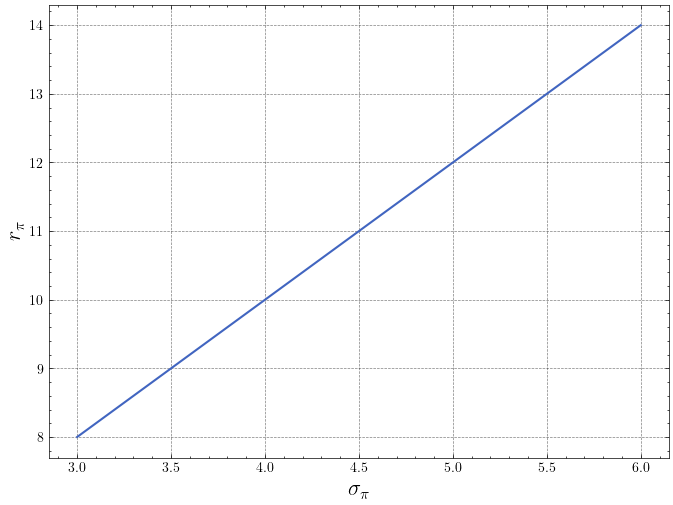

In [11]:
plt.figure(figsize=(8, 6), dpi=100)
# plt.title(r'No short sales - $\rho$=+1', size = 20)
plt.plot(σ_p_pos_1, r_p_pos_1, linestyle='solid', linewidth=1.5)
plt.ylabel(r'$r_\pi$', size=16)
plt.xlabel(r'$\sigma_\pi$', size=16)
plt.savefig('./ch_5_imgs/2_stocks_pefect_positive')

In [40]:
# TODO show perfectly correlated stocks lie on a line in risk return space

### Correlation = -1

This occurs when two securities always move in perfect unison but in oposite directions.

$$ \sigma_{\pi} = \sqrt{ X_A^2\sigma_A^2 - 2 X_A (1 - X_A) \sigma_A\sigma_B + (1 - X_A)^2\sigma_B^2}$$

which has two possible solutions 

$$ \sigma_{\pi} = - X_A\sigma_A  + (1 - X_A)\sigma_B$$

as well as 

$$ \sigma_{\pi} = + X_A\sigma_A - (1 - X_A)\sigma_B$$

the first equation holds when 

$$ X_A\sigma_A  < (1 - X_A)\sigma_B $$

and the second equation holds when 

$$ X_A\sigma_A  > (1 - X_A)\sigma_B $$

In [18]:
r_p_neg_1 = []
σ_p_neg_1 = []

for x_a in np.arange(0,1, 0.001):
    x_b = 1-x_a
    r_p_neg_1.append(calc_π_r(R̄_a, x_a, R̄_b, x_b)*1e2)
    σ_p_neg_1.append(calc_π_σ(σ_a, x_a, σ_b, x_b, -1)*1e2)

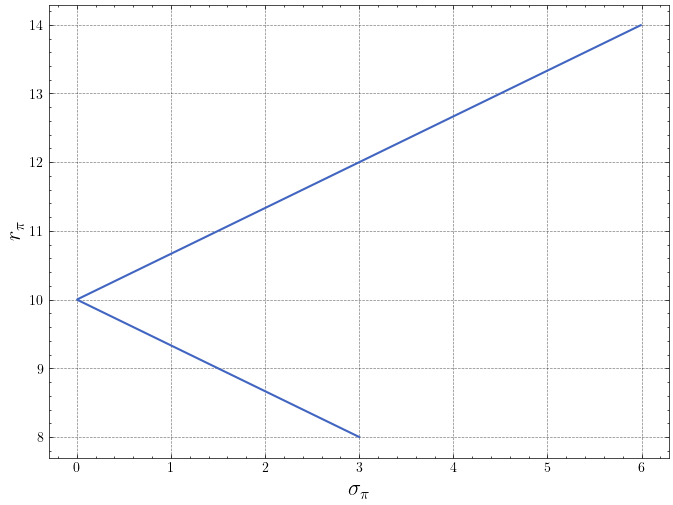

In [19]:
plt.figure(figsize=(8, 6), dpi=100)
# plt.title(r'No short sales - $\rho$=-1', size = 20)
plt.plot(σ_p_neg_1, r_p_neg_1, linewidth=1.5)
plt.ylabel(r'$r_p$', size=16)
plt.xlabel(r'$\sigma_p$', size=16)
plt.ylabel(r'$r_\pi$', size=16)
plt.xlabel(r'$\sigma_\pi$', size=16)
plt.savefig('./ch_5_imgs/2_stocks_pefect_neg')

### A perfectly riskless asset 

The above plot shows that when two assets are perfectly negatively correlated it is always possible to find some combination of them that has zero risk. This is found by setting one of of the two equations to zero.

$$X_{A} = \frac{\sigma_b}{\sigma_a + \sigma_b}$$

### Correlation = 0

With no corelation our expression for the volatility becomes 

$$ \sigma_{\pi} = \sqrt{ X_A^2\sigma_A^2 +  X_B^2\sigma_B^2}$$

One might be interesting in calculating the minimum risk portfolio. This is found by taking the first derivitive of the above equation and setting it equal to zero.

In [15]:
r_p_zero = []
σ_p_zero = []

for x_a in np.arange(0,1, 0.0001):
    x_b = 1-x_a
    r_p_zero.append(calc_π_r(R̄_a, x_a, R̄_b, x_b)*1e2)
    σ_p_zero.append(calc_π_σ(σ_a, x_a, σ_b, x_b, 0)*1e2)

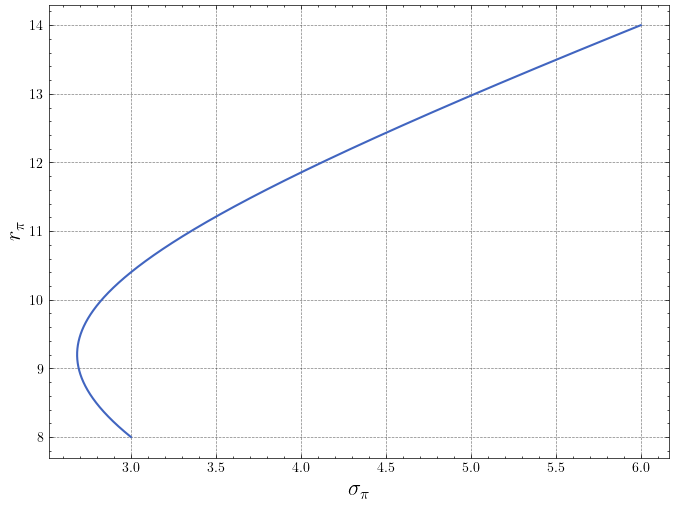

In [17]:
plt.figure(figsize=(8, 6), dpi=100)
# plt.title(r'No short sales - $\rho$=0', size = 20)
plt.plot(σ_p_zero, r_p_zero, linewidth=1.5)
plt.ylabel(r'$r_\pi$', size=16)
plt.xlabel(r'$\sigma_\pi$', size=16)
plt.savefig('./ch_5_imgs/2_stocks_zero')

### Minimum risk portfolio

We the corelation coefficient is not exactly +1 or -1 then one can't simply infer the minimum risk portfolio. For this we can take derivitive or the portfolio variance with respect to the ratio invested in stock a. Starting with the familiar expression 

$$ \sigma_{\pi} = \sqrt{ X_A^2\sigma_A^2 + 2 X_A (1 - X_A) \rho_{AB} \sigma_A\sigma_B + (1 - X_A)^2\sigma_B^2}$$

taking the first derivitive with respect to X_A gives.

$$ \frac{\partial \sigma_{\pi}}{\partial X_A} = 
                    \frac{1}{2} 
                     \frac{2X_A\sigma_A^2 - 2\sigma_B^2 + 2 X_A\sigma_B^2 + 2 \rho_{AB} \sigma_A\sigma_B- 4 X_A \rho_{AB} X_A X_B}
                     {\sqrt{ X_A^2\sigma_A^2 + 2 X_A (1 - X_A) \rho_{AB} \sigma_A\sigma_B + (1 - X_A)^2\sigma_B^2}}$$


we can now solve for $X_A$ in order to find the amount one must invest in stock a inorder to obtain the minimum risk portfolio

$$ X_{A_{min\_risk}} = \frac{\sigma_B^2 - \sigma_A \sigma_B \rho_{AB}}{\sigma_A^2 + \sigma_B^2 - \sigma_A \sigma_B \rho_{AB}}$$

In [23]:
def minimum_risk(σ_a, σ_b, ρ_ab):
    num = σ_b**2 - σ_a*σ_b*ρ_ab
    denom = σ_a**2 + σ_b**2 - σ_a*σ_b*ρ_ab
    return num / denom    

In [24]:
x_a_min_risk = minimum_risk(σ_a, σ_b, 0)
x_b_min_risk = 1 - x_a_min_risk 

In [25]:
π_r_min_risk =  calc_π_r(R̄_a, x_a_min_risk, R̄_b, x_b_min_risk)*1e2
π_σ_min_risk = calc_π_σ(σ_a, x_a_min_risk, σ_b, x_b_min_risk, 0)*1e2

In [26]:
r_p_zero = []
σ_p_zero = []

for x_a in np.arange(0,1, 0.0001):
    x_b = 1-x_a
    r_p_zero.append(calc_π_r(R̄_a, x_a, R̄_b, x_b)*1e2)
    σ_p_zero.append(calc_π_σ(σ_a, x_a, σ_b, x_b, 0)*1e2)

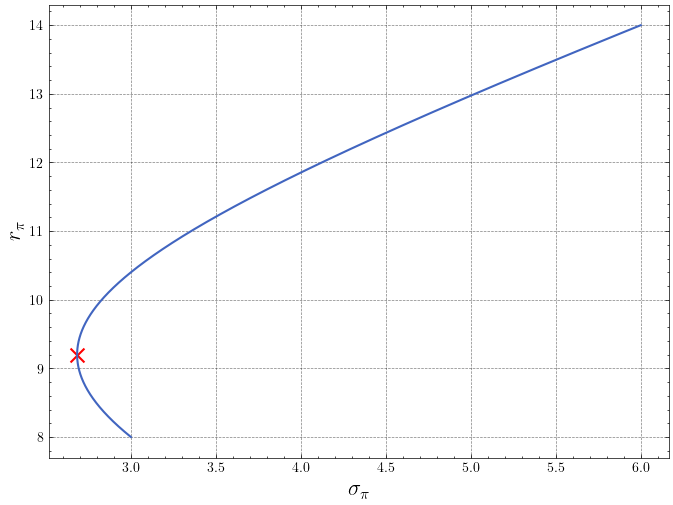

In [28]:
plt.figure(figsize=(8, 6), dpi=100)

# plt.title(r'No short sales - $\rho$=0', size = 18)
plt.plot(σ_p_zero, r_p_zero, linewidth=1.5)
plt.scatter(π_σ_min_risk, π_r_min_risk, marker='x', color='red', s=100, linewidth=1.5)
plt.ylabel(r'$r_\pi$', size=16)
plt.xlabel(r'$\sigma_\pi$', size=16)
plt.savefig('./ch_5_imgs/2_stocks_zero_min')

### Correlation = 0.5

Typically the corelation between two securities is between 0 and 1. We therfore examine a when the correlation coefficient is 0.5.

In [30]:
r_p_half = []
σ_p_half = []

for x_a in np.arange(0,1, 0.001):
    x_b = 1-x_a
    r_p_half.append(calc_π_r(R̄_a, x_a, R̄_b, x_b)*1e2)
    σ_p_half.append(calc_π_σ(σ_a, x_a, σ_b, x_b, 0.5)*1e2)

In [31]:
x_a_min_risk = minimum_risk(σ_a, σ_b, 0.5)
x_b_min_risk = 1 - x_a_min_risk 

In [32]:
π_r_min_risk =  calc_π_r(R̄_a, x_a_min_risk, R̄_b, x_b_min_risk)*1e2
π_σ_min_risk = calc_π_σ(σ_a, x_a_min_risk, σ_b, x_b_min_risk, 0)*1e2

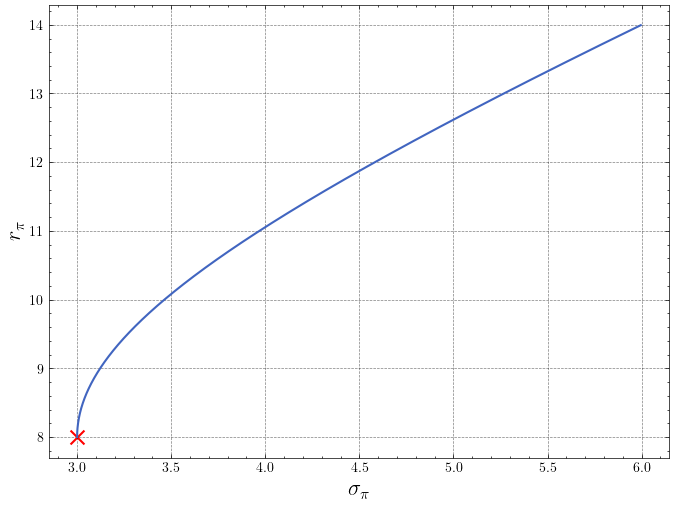

In [35]:
plt.figure(figsize=(8, 6), dpi=100)
# plt.title(r'No short sales - $\rho$=0.5', size = 18)
plt.plot(σ_p_half, r_p_half, linewidth=1.5)
plt.scatter(π_σ_min_risk, π_r_min_risk, marker='x', color='red', s=100, linewidth=1.5)
plt.ylabel(r'$r_\pi$', size=16)
plt.xlabel(r'$\sigma_\pi$', size=16)
plt.savefig('./ch_5_imgs/2_stocks_partial_min')

Notice that in this case the minimum risk portfolio occurs when the investor is fully invested in stock A. For all assets there is some value of $\rho_{AB}$ at which the portfolio can no longer be made less risky than the least risky asset.

## Key Insights

- The closer the corelation coefficient is to -1 the higher the payoff from diversification.
- Combiniations of 2 assets can never have more risk than that found on the line segment between the two assets.
- The minimum variance portfolio is easy to calculate analytically.

## Comparison

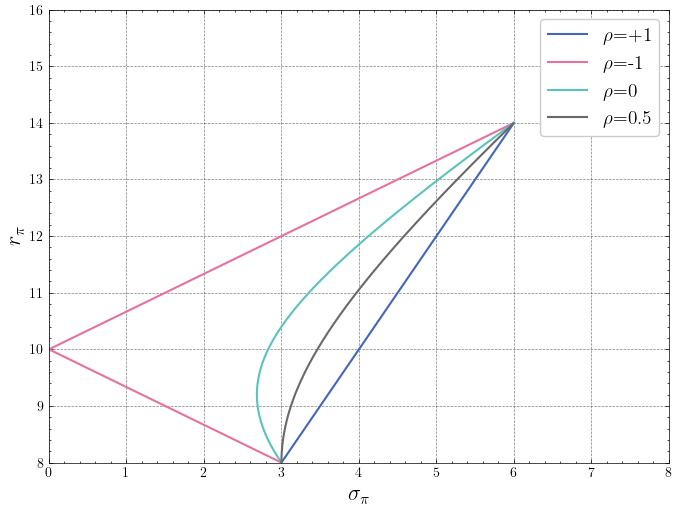

In [36]:
plt.figure(figsize=(8, 6), dpi=100)
# plt.title('Comparison', size = 20)


plt.plot(σ_p_pos_1, r_p_pos_1, label=r'$\rho$=+1', linewidth=1.5)
plt.plot(σ_p_neg_1, r_p_neg_1, label=r'$\rho$=-1', linewidth=1.5)
plt.plot(σ_p_zero, r_p_zero, label=r'$\rho$=0', linewidth=1.5)
plt.plot(σ_p_half, r_p_half, label=r'$\rho$=0.5', linewidth=1.5)

plt.xlim(0, 8)
plt.ylim(8, 16)


plt.legend(loc="upper right")
plt.legend(fontsize=14)
plt.ylabel(r'$r_\pi$', size=16)
plt.xlabel(r'$\sigma_\pi$', size=16)
plt.savefig('./ch_5_imgs/2_stocks_comp')

## Short Sales Allowed

In [293]:
r_p_short = []
σ_p_short = []

for x_a in np.arange(-1,2.2, 0.2):
    x_b = 1-x_a
    r_p_short.append(calc_π_r(R̄_a, x_a, R̄_b, x_b)*1e2)
    σ_p_short.append(calc_π_σ(σ_a, x_a, σ_b, x_b, 0.5)*1e2)

In [294]:
r_p_short

[1.9999999999999991,
 3.2,
 4.399999999999999,
 5.6,
 6.799999999999999,
 7.999999999999999,
 9.2,
 10.399999999999999,
 11.6,
 12.8,
 13.999999999999998,
 15.199999999999998,
 16.4,
 17.599999999999998,
 18.8,
 20.0]

In [295]:
σ_p_short

[6.0,
 5.126402247190519,
 4.3266615305567875,
 3.649657518178932,
 3.1749015732775088,
 3.0,
 3.1749015732775083,
 3.649657518178931,
 4.326661530556786,
 5.126402247190517,
 5.999999999999998,
 6.919537556802474,
 7.868926229162397,
 8.838551917593739,
 9.822423326246936,
 10.816653826391963]

Text(0.5, 0, '$\\sigma_p$')

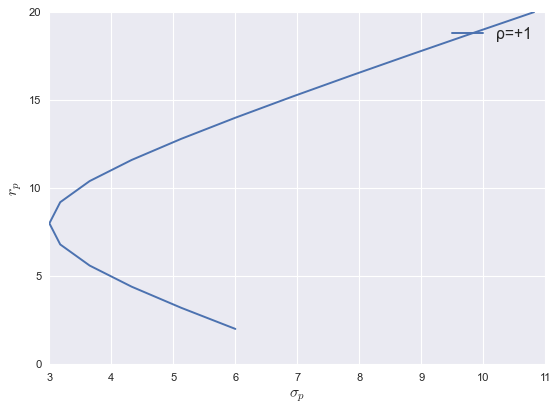

In [296]:
plt.plot(σ_p_short, r_p_short, label='ρ=+1')

plt.legend(loc="upper right")
plt.legend(fontsize=14)
plt.ylabel('$r_p$', size=14)
plt.xlabel('$\sigma_p$', size=14)

## Riskless Lending and Borrowing

The introduction of a riskless asset into the feasible set reduces the complexity of the analysis. A riskless rate is one in which we assume zero standard deviation for example a short-term goverment bill or savings account. Borrowing can be seen as selling the security short and borrowing takes place at the riskless rate. The return on such a portfolio is given by

$$ \bar{R}_{\pi} = X_A \bar{R}_A + (1-X_A)\bar{R}_F $$

and give the zero risk o f the portfolio the risk is given by 

$$ \sigma_{\pi} = X_A\sigma_A$$

solving for $X_A$ and substituting into the expression for the mean return we get

$$ \bar{R}_{\pi} =  \frac{\sigma_{\pi}}{\sigma_A} \bar{R}_A + (1-\frac{\sigma_{\pi}}{\sigma_A}) \bar{R}_F $$


$$ \bar{R}_{\pi} = R_F + \frac{\bar{R}_A - R_F}{\sigma_A}\sigma_C$$

this is the equation of a straight line that intercept return space at the risk free rate.

In [317]:
r_p_risk_free = []
σ_p_risk_free = []

R̄_F = 0.02

for x_a in np.arange(0,1.11, 0.1):
    x_b = 1-x_a
    r_p_risk_free.append(calc_π_r(R̄_a, x_a, R̄_F, x_b)*1e2)
    σ_p_risk_free.append(calc_π_σ(σ_a, x_a, 0, x_b, 0)*1e2)

Text(0.5, 0, '$\\sigma_p$')

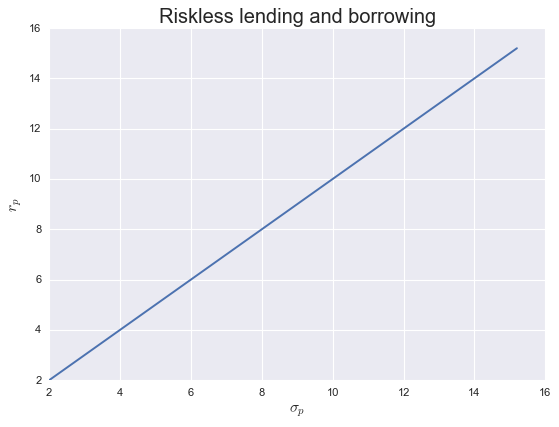

In [321]:
plt.title('Riskless lending and borrowing', size = 18)
plt.plot(r_p_risk_free, r_p_risk_free)



plt.ylabel('$r_p$', size=14)
plt.xlabel('$\sigma_p$', size=14)

#### Separation theorem

For the case where riskless lending and borrowing is allowed one can deduce identify the optimal portfolio of risky assets without knowing anything about the investor. This is called the *separation theorem*.